# Download and import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# Heart ratio

In [ ]:
heart_ratio = pd.read_csv('/content/drive/MyDrive/muscle_promoter/heartratio_per_patient_meanoflog.txt',sep='\t', index_col=0)
heart_ratio

,GTEX-SE5C,GTEX-SUCS,GTEX-1HCUA,GTEX-1I1CD,GTEX-1IDJD,GTEX-X62O,GTEX-1399U,GTEX-X4XX,GTEX-ZPCL,GTEX-12WSE,...,GTEX-12WSN,GTEX-13FXS,GTEX-WOFL,GTEX-1RQEC,GTEX-14PJ2,GTEX-YB5K,GTEX-12584,GTEX-OHPL,GTEX-1NHNU,GTEX-Y8E4
ratio,-1.330244,-0.605182,-0.189529,0.668146,4.311235,1.142919,-0.575805,0.849308,0.809811,2.432953,...,1.011721,2.315008,2.290999,-2.807707,-1.482882,1.670549,-0.132061,-2.679369,1.749475,-1.046237


# GTEx_blood_meanTPM

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/muscle_promoter/blood_per_patient_meanTPM.txt', sep='\t', index_col=0)
df.drop(columns=['Description'], inplace=True)
print(df.shape)

df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='any')

print(df.shape)
df.head()

(56200, 464)
(56200, 464)


,GTEX-SE5C,GTEX-SUCS,GTEX-1HCUA,GTEX-1I1CD,GTEX-1IDJD,GTEX-X62O,GTEX-1399U,GTEX-X4XX,GTEX-ZPCL,GTEX-12WSE,...,GTEX-12WSN,GTEX-13FXS,GTEX-WOFL,GTEX-1RQEC,GTEX-14PJ2,GTEX-YB5K,GTEX-12584,GTEX-OHPL,GTEX-1NHNU,GTEX-Y8E4
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,0.000,0.000000,0.019215,0.0885,0.000,0.00000,0.000,0.03770,0.03867,0.000,...,0.00845,0.2739,0.000,0.0000,0.000,0.0000,0.000,0.03852,0.000,0.019535
ENSG00000227232.5,4.423,2.605000,3.398000,2.7190,2.627,5.14900,1.078,2.82200,2.65150,3.007,...,2.17850,13.1700,1.001,0.8694,4.704,3.5855,2.621,4.93900,1.552,4.696500
ENSG00000278267.1,0.000,0.219750,0.000000,0.0000,0.000,0.00000,0.000,0.00000,0.32775,0.000,...,0.00000,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.00000,0.000,0.000000
ENSG00000243485.5,0.000,0.026430,0.000000,0.0000,0.000,0.06691,0.000,0.07527,0.00000,0.000,...,0.02532,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.00000,0.000,0.000000
ENSG00000237613.2,0.000,0.018775,0.000000,0.0000,0.000,0.00000,0.000,0.00000,0.00000,0.000,...,0.00000,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.00000,0.000,0.000000


In [ ]:
max_percent_cell_nonexpress = 0

df["non_express_gene"] = (df == 0).astype(int).sum(axis=1)
df = df.loc[(df['non_express_gene'] <= (df.shape[1])*max_percent_cell_nonexpress)]
print(max(df.non_express_gene))

df.drop(columns=['non_express_gene'], inplace=True)
df.shape

0


(11989, 464)

# Seurat pre-processing (scale data)

In [490]:
scale_data = pd.read_csv('/content/drive/MyDrive/muscle_promoter/scale_data.csv')

colnames = []
for colname in scale_data.columns.tolist():
  colnames.append(str(colname).replace('.', '-'))

scale_data = scale_data.set_axis(colnames, axis=1)

scale_data.head()

,GTEX-U3ZG-0006-SM-47JWX,GTEX-ZVZP-0006-SM-51MSW,GTEX-T6MO-0003-SM-3NMAG,GTEX-131XW-0006-SM-5O9AO,GTEX-1HFI7-0005-SM-ADEH1,GTEX-WOFM-0001-SM-4OOT2,GTEX-11DYG-0006-SM-5NQB2,GTEX-ZTTD-0006-SM-51MSJ,GTEX-1R9K5-0006-SM-DO939,GTEX-1B8SF-0005-SM-7MGVK,...,GTEX-1QP9N-0005-SM-CY8H9,GTEX-X585-0002-SM-46MVA,GTEX-T6MN-0002-SM-3NMAH,GTEX-ZVP2-0005-SM-51MRK,GTEX-OHPL-0006-SM-3MJHB,GTEX-1HBPN-0002-SM-EYYW2,GTEX-1QCLZ-0006-SM-CY8GW,GTEX-1HCU9-0005-SM-A9G1A,GTEX-17HII-0005-SM-7MKF6,GTEX-XPT6-0001-SM-4B64G
ENSG00000223972.5,0.132505,-0.089258,-0.000765,2.307719,1.662731,-0.535957,0.105217,-0.535957,-0.535957,0.408756,...,-0.535957,-0.535957,-0.535957,0.399458,0.130631,-0.535957,-0.535957,0.026328,-0.535957,-0.535957
ENSG00000227232.5,-1.001229,-0.101471,-0.369008,-0.311816,-0.759530,-0.693469,0.239518,-0.794352,-0.451093,-0.205845,...,0.458992,-0.750838,-0.936774,-0.200302,0.426802,-0.727035,0.540175,-0.746887,-0.596788,-0.466337
ENSG00000278267.1,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525,...,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525,-0.145525
ENSG00000243485.5,-0.385052,-0.385052,-0.385052,-0.385052,-0.385052,-0.385052,-0.385052,1.647224,-0.385052,-0.385052,...,-0.385052,-0.385052,-0.385052,-0.385052,-0.385052,-0.385052,-0.385052,-0.385052,1.633187,-0.385052
ENSG00000237613.2,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136,...,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136,-0.354136


In [491]:
def remove_duplicate_in_list(mylist):
  return list( dict.fromkeys(mylist))

def find_position(s, ch):
  return [i for i, letter in enumerate(s) if letter == ch]

def patient_id(sample_name):
  return sample_name[ 0 : find_position(sample_name, '-')[1] ]

In [492]:
list_patients = heart_ratio.columns.tolist()
len(list_patients)

464

In [493]:
list_blood_samples = []

for sample in scale_data.columns.tolist():
  patient = patient_id(sample)
  if patient in list_patients: list_blood_samples.append(sample)

scale_data = scale_data[list_blood_samples]

print(len(list_blood_samples), scale_data.shape)

564 (51677, 564)


In [494]:
heart_ratio_extended = pd.DataFrame(columns=scale_data.columns.tolist(), index=['ratio'])
heart_ratio_extended

for sample in scale_data.columns.tolist():
  patient = patient_id(sample)
  heart_ratio_extended[sample].loc['ratio'] = heart_ratio[patient].loc['ratio']

heart_ratio_extended

,GTEX-ZVZP-0006-SM-51MSW,GTEX-1HFI7-0005-SM-ADEH1,GTEX-11DYG-0006-SM-5NQB2,GTEX-ZTTD-0006-SM-51MSJ,GTEX-1R9K5-0006-SM-DO939,GTEX-1B8SF-0005-SM-7MGVK,GTEX-13W3W-0005-SM-5SI9Y,GTEX-Z93S-0005-SM-4RGLW,GTEX-P4PQ-0005-SM-2HMKJ,GTEX-1JJEA-0006-SM-DHXJ2,...,GTEX-Y8E4-0003-SM-4V6FY,GTEX-11TT1-0005-SM-5NQ8Y,GTEX-15RJ7-0006-SM-7RHHM,GTEX-18A7A-0006-SM-7PC1P,GTEX-T6MN-0002-SM-3NMAH,GTEX-OHPL-0006-SM-3MJHB,GTEX-1HBPN-0002-SM-EYYW2,GTEX-1QCLZ-0006-SM-CY8GW,GTEX-17HII-0005-SM-7MKF6,GTEX-XPT6-0001-SM-4B64G
ratio,-1.30765,0.254313,1.268426,2.269179,-4.710115,0.327043,2.051707,2.097092,-3.877234,-1.179553,...,-1.046237,2.26468,-3.747814,1.389876,-4.232937,-2.679369,1.913095,0.492748,-1.71359,0.333516


In [517]:
import random

list_samples = heart_ratio_extended.columns.tolist()
list_samples = random.sample(list_samples, k=len(list_samples))

X_train = np.asarray(scale_data[list_samples].T).astype('float32')
Y_train = np.asarray(heart_ratio_extended[list_samples].loc['ratio']).astype('float32')


#train-val-test split
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5, random_state=42)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

(394, 51677) (394,) (85, 51677) (85,) (85, 51677) (85,)


# Blood TPM and Spearman

In [ ]:
!wget https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz
!wget https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt
!gzip -d *gz

--2022-04-12 17:50:50--  https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625807147 (1.5G) [application/octet-stream]
Saving to: ‘GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz’

GTEx_Analysis_2017- 100%[===================>]   1.51G  70.3MB/s    in 24s     

2022-04-12 17:51:14 (65.1 MB/s) - ‘GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz’ saved [1625807147/1625807147]

--2022-04-12 17:51:14--  https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to st

In [ ]:
tpm = pd.read_csv("./GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct", skiprows=2, sep='\t')
attr = pd.read_csv("GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep='\t')
attr_blood = attr.loc[attr.SMTS=='Blood']

In [ ]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))
    
sample_blood = intersection(attr_blood.SAMPID.tolist(), tpm.columns[2:])
blood_tpm = tpm[sample_blood]
blood_tpm.index = tpm.Name

In [ ]:
list_blood_samples = []

for sample in blood_tpm.columns.tolist():
  patient = patient_id(sample)
  if patient in list_patients: list_blood_samples.append(sample)

blood_tpm = blood_tpm[list_blood_samples]

print(len(list_blood_samples), blood_tpm.shape)

564 (56200, 564)


In [ ]:
max_percent_cell_nonexpress = 0.9

blood_tpm["non_express_gene"] = (blood_tpm == 0).astype(int).sum(axis=1)
blood_tpm = blood_tpm.loc[(blood_tpm['non_express_gene'] <= (blood_tpm.shape[1])*max_percent_cell_nonexpress)]
print(max(blood_tpm.non_express_gene))

blood_tpm.drop(columns=['non_express_gene'], inplace=True)
blood_tpm.shape

508


(35789, 564)

In [ ]:
heart_ratio_extended = pd.DataFrame(columns=blood_tpm.columns.tolist(), index=['ratio'])
heart_ratio_extended

for sample in blood_tpm.columns.tolist():
  patient = patient_id(sample)
  heart_ratio_extended[sample].loc['ratio'] = heart_ratio[patient].loc['ratio']

heart_ratio_extended

,GTEX-1J8EW-0006-SM-CNNOW,GTEX-1H11D-0005-SM-ACKV7,GTEX-1I1CD-0005-SM-ADEGY,GTEX-1N2EF-0005-SM-CXZIL,GTEX-1H23P-0005-SM-A9G14,GTEX-YB5K-0005-SM-4VDSP,GTEX-1R7EV-0005-SM-DO938,GTEX-ZG7Y-0006-SM-4WWEA,GTEX-1P4AB-0005-SM-CY8GM,GTEX-1A3MW-0006-SM-7MKGU,...,GTEX-UPK5-0003-SM-3NMDI,GTEX-11ONC-0005-SM-5O9CY,GTEX-1KXAM-0005-SM-DIPEC,GTEX-117YW-0005-SM-5NQ8Z,GTEX-WEY5-0001-SM-3P61Z,GTEX-14JG1-0006-SM-7SB6P,GTEX-1IDJH-0006-SM-CMKFT,GTEX-14PK6-0006-SM-7PC1L,GTEX-132NY-0005-SM-5O9AC,GTEX-14BIL-0006-SM-5N9F2
ratio,-0.144195,-1.194777,0.668146,-0.341594,-1.785187,1.670549,0.285181,-0.947373,3.015641,-0.308454,...,-0.844285,-2.369347,-1.039604,-1.702101,0.986712,-0.180146,-0.902631,-0.760706,0.460378,-0.600473


In [ ]:
import random

list_samples = heart_ratio_extended.columns.tolist()
list_samples = random.sample(list_samples, k=len(list_samples))

X_train = np.asarray(blood_tpm[list_samples].T).astype('float32')
Y_train = np.asarray(heart_ratio_extended[list_samples].loc['ratio']).astype('float32')


#train-val-test split
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5, random_state=42)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

(394, 35789) (394,) (85, 35789) (85,) (85, 35789) (85,)


In [ ]:
from scipy.stats import spearmanr

spear_correlation = []
for i in range(len(X_train.T)):
  corr_spearman = spearmanr(X_train.T[i], Y_train)[0]
  p_spearman = spearmanr(X_train.T[i], Y_train)[1]
  spear_correlation.append([corr_spearman, p_spearman])


spear_correlation = pd.DataFrame(spear_correlation, columns=['corr','pval'])
spear_correlation.head()

,corr,pval
0,-0.107906,0.032248
1,-0.010898,0.829272
2,-0.002934,0.953710
3,0.002117,0.966580
4,-0.056225,0.265554


In [ ]:
k_best = spear_correlation[spear_correlation.pval<0.05].index.tolist()

X_train_selected = X_train.T[k_best].T
X_val_selected = X_val.T[k_best].T
X_test_selected = X_test.T[k_best].T

print(X_train_selected.shape, Y_train.shape, X_val_selected.shape, Y_val.shape, X_test_selected.shape, Y_test.shape)

(394, 6273) (394,) (85, 6273) (85,) (85, 6273) (85,)


In [ ]:
def normalize_data(X_train, X_val, X_test):
  mean = X_train.mean(axis=0)
  std = X_train.std(axis=0)
  X_train = (X_train - mean) / std
  X_val = (X_val - mean) / std
  X_test = (X_test - mean) / std
  return X_train, X_val, X_test

X_train_selected, X_val_selected, X_test_selected = normalize_data(X_train_selected, X_val_selected, X_test_selected)

In [ ]:
alpha=0.05
max_iter=50000

X_train_selected, Y_train, X_val_selected, Y_val, X_test_selected, Y_test = lasso_selection(X_train_selected, Y_train, X_val_selected, Y_val, X_test_selected, Y_test, 
                                                                                            alpha, max_iter)
print(X_train_selected.shape, Y_train.shape, X_val_selected.shape, Y_val.shape, X_test_selected.shape, Y_test.shape)

(394, 216) (394,) (85, 216) (85,) (85, 216) (85,)


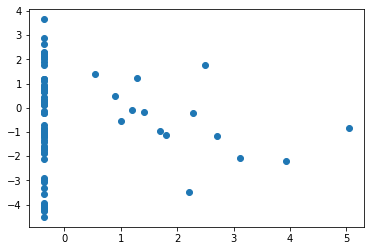

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_val_selected.T[0], Y_val)
plt.show()

# Feature selection

In [518]:
def normalize_data(X_train, X_val, X_test):
  mean = X_train.mean(axis=0)
  std = X_train.std(axis=0)
  X_train = (X_train - mean) / std
  X_val = (X_val - mean) / std
  X_test = (X_test - mean) / std
  return X_train, X_val, X_test

# feature selection
def lasso_selection(X_train, Y_train, X_val, Y_val, X_test, Y_test, alpha, max_iter):
  from sklearn.linear_model import Lasso
  from sklearn.feature_selection import SelectFromModel

  lsvc = Lasso(alpha=alpha, max_iter=max_iter)
  lsvc.fit(X_train, Y_train)
  selectmodel = SelectFromModel(lsvc, prefit=True)

  X_train_selected = selectmodel.transform(X_train)
  X_val_selected = selectmodel.transform(X_val)
  X_test_selected = selectmodel.transform(X_test)

  return X_train_selected, Y_train, X_val_selected, Y_val, X_test_selected, Y_test




##################################################################################
##################################################################################
##################################################################################

#X_train, X_val, X_test = normalize_data(X_train, X_val, X_test)

alpha=0.1
max_iter=50000
X_train_selected, Y_train, X_val_selected, Y_val, X_test_selected, Y_test = lasso_selection(X_train, Y_train, X_val, Y_val, X_test, Y_test, 
                                                                                            alpha, max_iter)

print(X_train_selected.shape, Y_train.shape, X_val_selected.shape, Y_val.shape, X_test_selected.shape, Y_test.shape)

(394, 213) (394,) (85, 213) (85,) (85, 213) (85,)


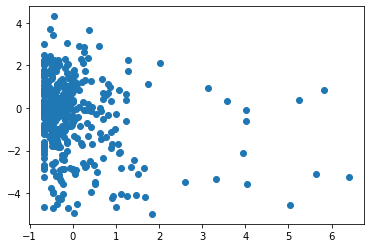

In [519]:
import matplotlib.pyplot as plt

plt.scatter(X_train_selected.T[0], Y_train)
plt.show()

# Data reshape for CONV1D

In [520]:
sample_size = X_train_selected.shape[0] # number of samples in train set
time_steps  = X_train_selected.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

X_train_selected = X_train_selected.reshape(sample_size,time_steps,input_dimension)
X_train_selected.shape #[batch_size, time_steps, input_dimension]

(394, 213, 1)

In [521]:
X_val_selected = X_val_selected.reshape(X_val_selected.shape[0],X_val_selected.shape[1],1)
X_test_selected = X_test_selected.reshape(X_test_selected.shape[0],X_test_selected.shape[1],1)

# Model and training

In [522]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, Dropout, MaxPooling1D, Dense, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def plot_prediction(test_labels, test_predictions):
  plt.figure(figsize=(10,5))

  plt.subplot(1, 2, 1)
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])


  plt.subplot(1, 2, 2)
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error")
  _ = plt.ylabel("Count")

def plot_track_training_regression(history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(15,5))

  plt.subplot(1, 3, 1)
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.title('mse')

  plt.subplot(1, 3, 2)
  plt.plot(history.history['mean_absolute_error'], label='train')
  plt.plot(history.history['val_mean_absolute_error'], label='Validation')
  plt.title('mae')

  plt.subplot(1, 3, 3)
  plt.plot(history.history['r_square'], label='train')
  plt.plot(history.history['val_r_square'], label='Validation')
  plt.title('r_square')

  plt.show()


In [528]:
l1=0.01
l2=0.01
Dropout_rate=0.3

def MLP_model(l1,l2,Dropout_rate):
  model = keras.Sequential([keras.layers.Input(shape=(X_train_selected.shape[1],)),  

                            keras.layers.Dense(32, activation=tf.nn.relu, 
                                             kernel_regularizer=regularizers.L1L2(l1=l1, l2=l2),
                                             kernel_initializer='he_normal', use_bias=True
                                             ),
                          
                            keras.layers.Dropout(Dropout_rate),

                            keras.layers.Dense(32, activation=tf.nn.relu, 
                                             kernel_regularizer=regularizers.L1L2(l1=l1, l2=l2),
                                             kernel_initializer='he_normal', use_bias=True
                                             ),
                          
                            keras.layers.Dropout(Dropout_rate),

                            keras.layers.Dense(1, 
                                             kernel_regularizer=regularizers.L1L2(l1=l1, l2=l2),
                                             kernel_initializer='he_normal', use_bias=True
                                             )
                          ])
  return model


def conv1D_model():

  n_timesteps = X_train_selected.shape[1]
  n_features  = X_train_selected.shape[2] 

  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))

  return model



lr=0.001
loss = 'mse'
optimizer = tf.keras.optimizers.RMSprop(lr)

model = conv1D_model()
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[r_square, 'mean_absolute_error'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, mode='min') 
history = model.fit(X_train_selected, Y_train, 
                    epochs=1000, batch_size=32,
                    shuffle=True, 
                    #validation_split=0.2,
                    validation_data = [X_val_selected, Y_val], 
                    callbacks=[early_stop],
                    verbose=0)

model.summary()

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 207, 64)           512       
                                                                 
 dropout_107 (Dropout)       (None, 207, 64)           0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 205, 32)           6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 204, 16)           1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 102, 16)          0         
                                                                 
 flatten_6 (Flatten)         (None, 1632)              0         
                                                                 
 Dense_1 (Dense)             (None, 32)              

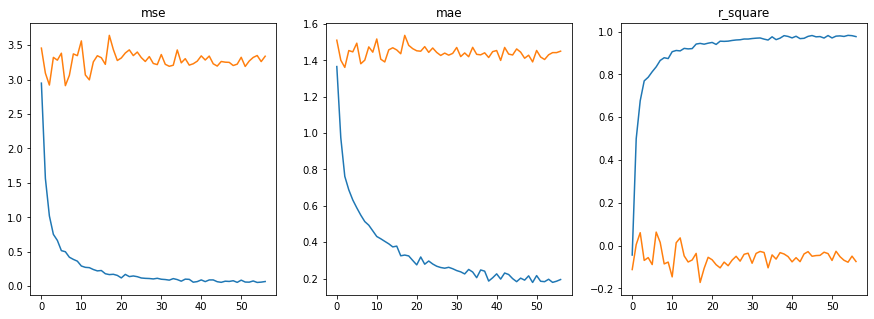

In [524]:
plot_track_training_regression(history)

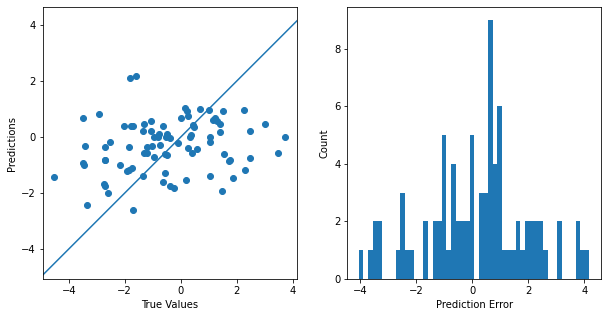

In [525]:
plot_prediction(Y_val, model.predict(X_val_selected).flatten())

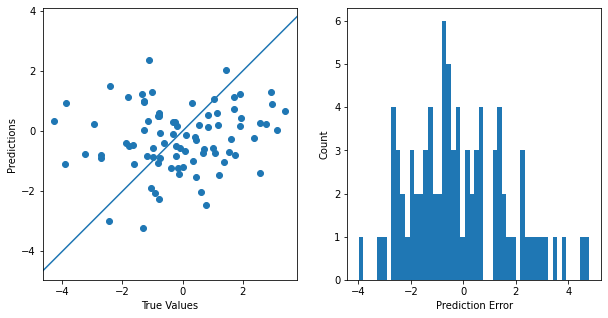

In [526]:
plot_prediction(Y_test, model.predict(X_test_selected).flatten())

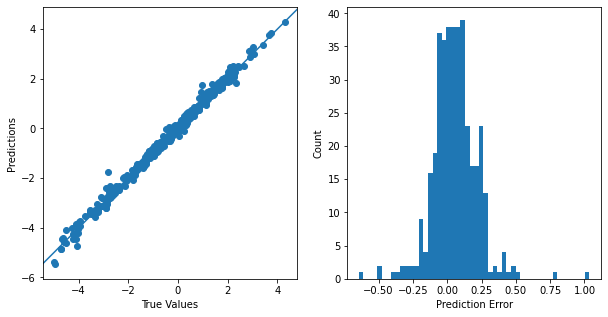

In [527]:
plot_prediction(Y_train, model.predict(X_train_selected).flatten())